## ANALISIS DE TENDENCIAS DE CONSUMOS E INFRAESTRUCTURAS

_By JoseForguez & DiegoTondo, 2020-08-09_

In [13]:
import pandas as pd
import numpy as np
import warnings
import glob
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as plotly
from plotly.subplots import make_subplots

import matplotlib.dates as md

In [14]:
#pd.set_option('display.max_columns', 50)

#### LOAD TRANSACTIONS

In [15]:
df_transa = pd.read_csv('../dataset/data_csv/sis_transa_201801_202007_merged.csv.zip', parse_dates=['fecha'], compression='zip', )

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (5,6,7,8,20,23,24) have mixed types.Specify dtype option on import or set low_memory=False.



In [16]:
df_transa.columns

Index(['baja_x', 'cantidad', 'codigo_error', 'departamento', 'fecha',
       'fecha_stop', 'geo_latitud', 'geo_longitud', 'geo_status', 'hora',
       'hora_stop', 'id_bomba', 'id_equipo', 'id_tanque', 'id_transaccion',
       'id_usuario', 'id_vehiculo', 'producto', 'pump_site_id', 'sync',
       'tank_site_id', 'temp_start', 'temp_stop', 'user_site_id',
       'veh_site_id', 'veh_tag_id', 'volume_start', 'volume_stop',
       'id_empresa', 'descripcion', 'ultima_fecha', 'ultima_fecha_h',
       'firmware_version', 'baja_x.1', 'ultima_fecha_sync_db',
       'current_firmware', 'ultima_sincronizacion', 'ultima_conexion',
       'delay_ue', 'geo_latitude', 'geo_longitude', 'id_canal', 'empresa',
       'baja_y', 'segmento', 'baja_y.1', 'main_id'],
      dtype='object')

## CONSUMPTION IN TIME

In [17]:
df_transa_pos = df_transa.copy()

In [18]:
dfgroupby_equipo = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = pd.Grouper(key="fecha", freq="M")

dfgroupby_equipo['cantidad'] = df_transa_pos.groupby(grupo)['cantidad'].sum()
dfgroupby_equipo['main_id'] = df_transa_pos.groupby(grupo)['main_id'].nunique()
dfgroupby_equipo['id_bomba'] = df_transa_pos.groupby(grupo)['id_bomba'].nunique()

In [19]:
dfgroupby_equipo.reset_index(inplace=True)

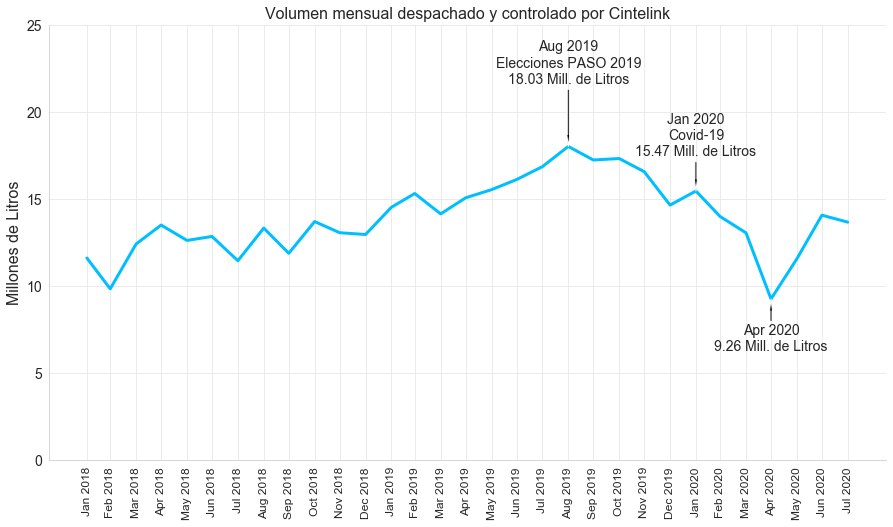

In [20]:
# sp2.set_title("Cantidad de litros despachados")
#ax=sns.distplot(dfgroupby_equipo['cantidad'],kde=False, norm_hist=False, label='volumen suministrado[Lts]')
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo

# with sns.axes_style("whitegrid"):
sns.set_style("whitegrid", {"grid.color": ".9"})
ax1 = sns.lineplot(x=df['fecha'],y=df['cantidad']/1e6, linewidth=3, color='deepskyblue')
#plt.scatter(xm,ym, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)
#plt.scatter(xm_covid, ym_covid, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)
#plt.scatter(xmm,ymm, s=100, c='g',  alpha=0.4, edgecolors="g", linewidth=5)

ym = df['cantidad'].max()/1e6
xm = df['fecha'][df['cantidad'].idxmax()]
ymm = df['cantidad'].min()/1e6
xmm = df['fecha'][df['cantidad'].idxmin()]
xm_covid = pd.to_datetime('2020-01-31')
ym_covid = df.iloc[df.set_index('fecha').index.get_loc(xm_covid, method='nearest')]['cantidad']/1e6

# Max
plt.annotate('{}\nElecciones PASO 2019\n{:.2f} Mill. de Litros'.format(xm.strftime("%b %Y"), ym), 
             xy=(xm,ym), 
             xytext=(xm, ym*1.2), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))

plt.annotate('{}\nCovid-19\n{:.2f} Mill. de Litros'.format(xm_covid.strftime("%b %Y"), ym_covid), 
             xy=(xm_covid, ym_covid), 
             xytext=(xm_covid, ym_covid+2), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
# Min
plt.annotate('{}\n{:.2f} Mill. de Litros'.format(xmm.strftime("%b %Y"), ymm), 
             xy=(xmm,ymm), 
             xytext=(xmm, ymm-3), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
#bbox_props = dict(
#    boxstyle="rarrow,pad=0.5", 
#    fc="cyan", ec="b", lw=1
#)
#plt.text(xm, ym-2, "Politics & Covid Effect", 
#            ha="left", va="top", 
#            rotation=-35,
#            size=15,
#            bbox=bbox_props)
# ax1.annotate('local max', xy=(3, 1),  xycoords='data',
#             xytext=(0.8, 0.95), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',
#             )
plt.ylabel('Millones de Litros',fontsize=16)
plt.xlabel('')
plt.title("Volumen mensual despachado y controlado por Cintelink",fontsize=16)
plt.ylim(0,25)
# ax.set_yscale('log')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(df['fecha'],fontsize=12, rotation='90')
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()
plt.show()
# fig.savefig('report_volumen.pdf')

In [21]:
dfgroupby_equipo

,fecha,cantidad,main_id,id_bomba
0,2018-01-31,1.161432e+07,1693,225
1,2018-02-28,9.843085e+06,1713,243
2,2018-03-31,1.241991e+07,1796,258
3,2018-04-30,1.350934e+07,1821,249
4,2018-05-31,1.262542e+07,1840,257
5,2018-06-30,1.285363e+07,1822,260
6,2018-07-31,1.145764e+07,1790,256
7,2018-08-31,1.333523e+07,1832,278
8,2018-09-30,1.188680e+07,1869,306
9,2018-10-31,1.371056e+07,2011,311


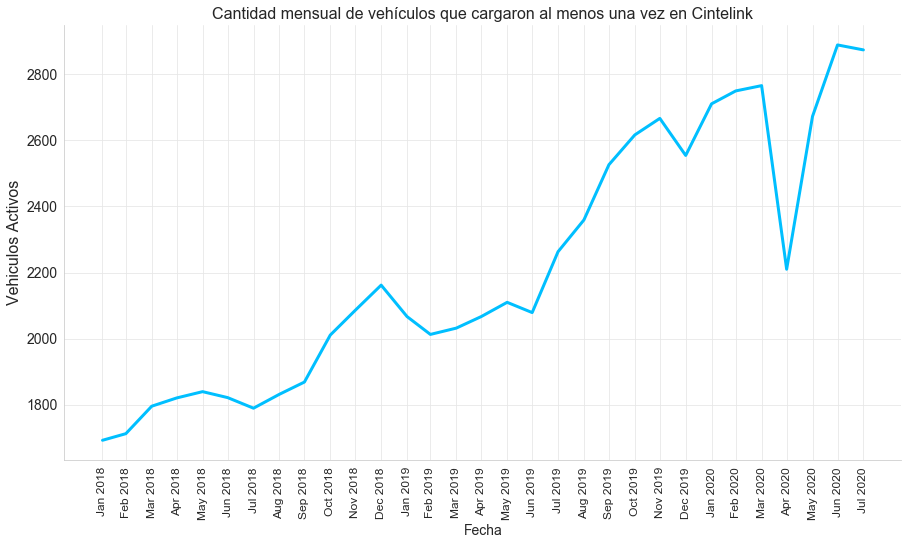

In [22]:
df = dfgroupby_equipo

fig = plt.figure(figsize=(15,8))

ax1 = sns.lineplot(x=df['fecha'],y=df['main_id'], linewidth=3, color='deepskyblue')

plt.ylabel('Vehiculos Activos',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de vehículos que cargaron al menos una vez en Cintelink",fontsize=16)
#plt.ylim(4,8)
# ax.set_yscale('log')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.xticks(df['fecha'],fontsize=12, rotation='90')
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()



plt.show()

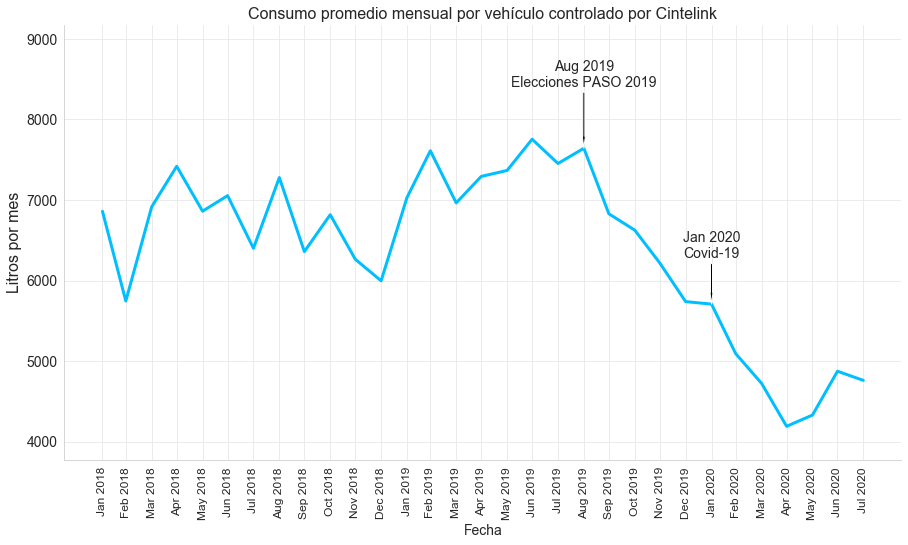

In [23]:
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo[dfgroupby_equipo['fecha']>'2019-08-01']

y = df['cantidad']/df['main_id']

ax1=sns.lineplot(x=dfgroupby_equipo['fecha'],
                y=dfgroupby_equipo['cantidad']/dfgroupby_equipo['main_id'], linewidth=3, color='deepskyblue')

ym = y.max()
ymim = y.min()
xm = df['fecha'][y.idxmax()]

xm_covid = pd.to_datetime('2020-01-31')

ym_covid = y.iloc[df.set_index('fecha').index.get_loc(xm_covid, method='nearest')]

# Max
plt.annotate('{}\nElecciones PASO 2019'.format(xm.strftime("%b %Y")), 
             xy=(xm,ym), 
             xytext=(xm, ym*1.1), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))

plt.annotate('{}\nCovid-19'.format(xm_covid.strftime("%b %Y")), 
             xy=(xm_covid, ym_covid), 
             xytext=(xm_covid, ym_covid*1.1), 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))
# Min
# plt.annotate('{}\n{:.2f} Mill. de Litros'.format(xmm.strftime("%b %Y"), ymm), 
#              xy=(xmm,ymm), 
#              xytext=(xmm, ymm-3), 
#              fontsize=14,
#              ha='center',
#              arrowprops=dict(facecolor='black', shrink=0.0, headwidth=3, width=2))


plt.ylabel('Litros por mes',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Consumo promedio mensual por vehículo controlado por Cintelink",fontsize=16)
plt.ylim(ymim*0.9,ym*1.2)
# ax.set_yscale('log')
plt.xticks(dfgroupby_equipo['fecha'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=14)
plt.grid(True)
sns.despine()



plt.show()

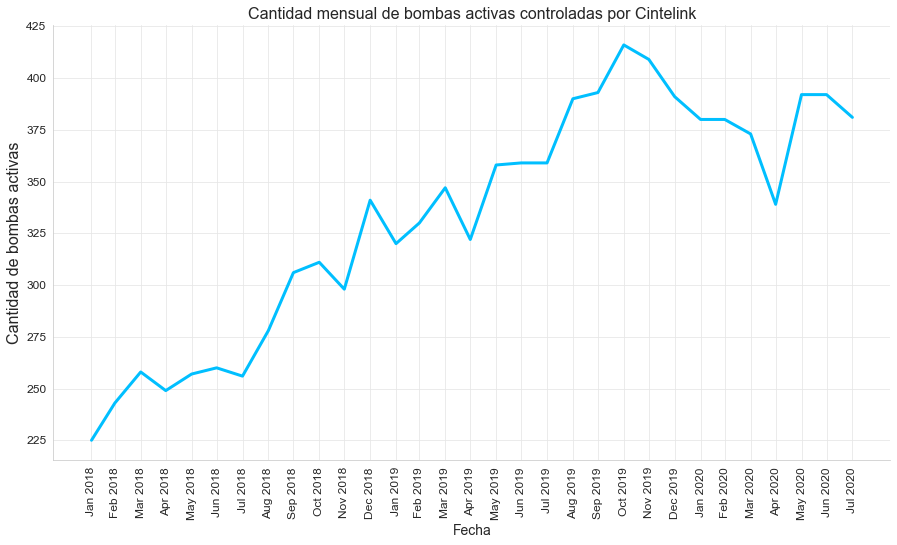

In [24]:
fig = plt.figure(figsize=(15,8))

df = dfgroupby_equipo
ax1=sns.lineplot(x=df['fecha'],y=df['id_bomba'], linewidth=3, color='deepskyblue')

plt.ylabel('Cantidad de bombas activas',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de bombas activas controladas por Cintelink",fontsize=16)
# plt.ylim(4,8)
# ax.set_yscale('log')
plt.xticks(df['fecha'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()

## ANALISIS DE HISTORIAL DE TANQUES

In [25]:
df_historial = pd.read_csv('../dataset/data_csv/historial_tanques_ultra_light.zip', parse_dates=['fecha_hora'], compression='zip')
df_historial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164171 entries, 0 to 3164170
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   fecha_hora  datetime64[ns]
 1   id_equipo   int64         
 2   id_tanque   int64         
 3   volumen     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 96.6 MB


In [26]:
dfgroupby_historial = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = pd.Grouper(key="fecha_hora", freq="M")

dfgroupby_historial['id_tanque'] = df_historial.groupby(grupo)['id_tanque'].nunique()
dfgroupby_historial['volumen'] = df_historial.groupby(grupo)['volumen'].mean()
dfgroupby_historial.reset_index(inplace=True)

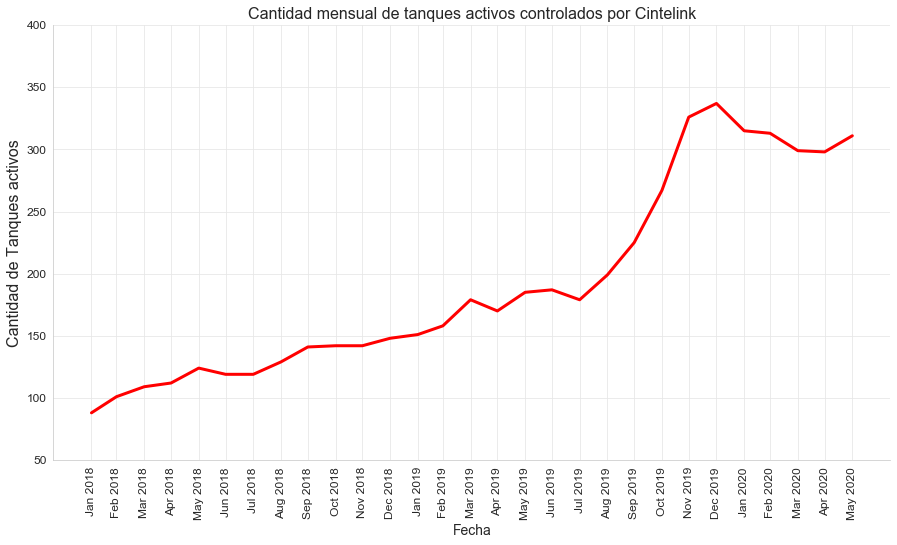

In [27]:
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(x=dfgroupby_historial['fecha_hora'],y=dfgroupby_historial['id_tanque'], linewidth=3, color='Red')

plt.ylabel('Cantidad de Tanques activos',fontsize=16)
plt.xlabel('Fecha',fontsize=14)
plt.title("Cantidad mensual de tanques activos controlados por Cintelink",fontsize=16)
plt.ylim(50,400)
# ax.set_yscale('log')
plt.xticks(dfgroupby_historial['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()

In [28]:
fs_tanque = pd.read_csv('../dataset/data_csv/fs_tanques.csv')
fs_tanque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_tanque        1641 non-null   int64  
 1   id_equipo        1641 non-null   int64  
 2   tanque           1641 non-null   object 
 3   producto         1641 non-null   object 
 4   cantidad         1641 non-null   object 
 5   ultima_cantidad  1641 non-null   object 
 6   ultima_fecha     1580 non-null   object 
 7   capacidad        1641 non-null   object 
 8   log_interval     1641 non-null   object 
 9   nivel_alarma     1641 non-null   float64
 10  alarma           1641 non-null   int64  
 11  mail_enviado     1641 non-null   int64  
 12  baja             1641 non-null   int64  
 13  sync             1641 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 179.6+ KB


In [29]:
dfgroupby_tanques = pd.DataFrame()
# grupo = ['id_equipo','mes']
# grupo = 'id_equipo'
grupo = [pd.Grouper(key="fecha_hora", freq="M"),'id_tanque']

# dfgroupby_tanques['id_tanque'] = df_historiales.groupby(grupo)['id_tanque'].nunique()
dfgroupby_tanques['volumen'] = df_historial.groupby(grupo)['volumen'].mean()

In [30]:
index=fs_tanque.set_index('id_tanque').index.get_indexer(dfgroupby_tanques.reset_index('fecha_hora').index)

In [31]:
dfgroupby_tanques['capacidad']=fs_tanque.iloc[index]['capacidad'].values

In [32]:
dfgroupby_tanques['capacidad']=dfgroupby_tanques['capacidad'].astype('float')

In [33]:
grupo = pd.Grouper(key="fecha_hora", freq="M")
dfgroupby_capacidades=pd.DataFrame()
dfgroupby_capacidades['capacidad']=dfgroupby_tanques.reset_index().groupby(grupo)['capacidad'].sum()
dfgroupby_capacidades.reset_index(inplace=True)

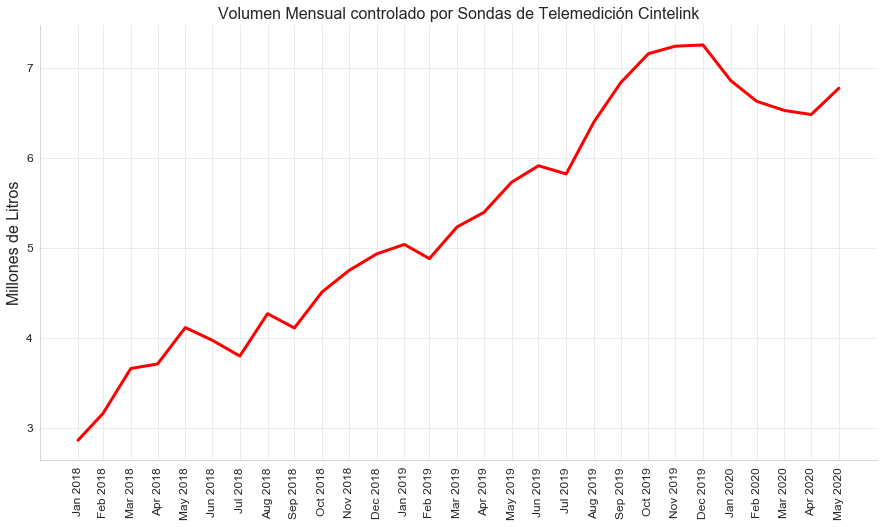

In [34]:
fig = plt.figure(figsize=(15,8))

ax1=sns.lineplot(x=dfgroupby_capacidades['fecha_hora'],y=dfgroupby_capacidades['capacidad']/1e6, linewidth=3, color='Red')

plt.ylabel('Millones de Litros',fontsize=16)
plt.xlabel('',fontsize=14)
plt.title("Volumen Mensual controlado por Sondas de Telemedición Cintelink",fontsize=16)
# plt.ylim(50,400)
# ax.set_yscale('log')
plt.xticks(dfgroupby_historial['fecha_hora'],fontsize=12, rotation='90')
ax1.xaxis.set_major_formatter(md.DateFormatter('%b %Y'))
plt.yticks(fontsize=12)
plt.grid(True)
sns.despine()



plt.show()